In [1]:
import sys
sys.path.append('../code')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Make some fake data

In [3]:
rand_state = np.random.RandomState(seed=24)
z_spec = rand_state.uniform(0, 3., size=10000)

In [4]:
z_obs = z_spec + rand_state.normal(loc=0.0*(1+z_spec), scale=0.06*(1+z_spec), size=len(z_spec))
z_obs[z_obs < 0] = 0.

In [5]:
z_obs

array([2.73497657, 1.71151317, 2.9437329 , ..., 0.56092669, 0.16109744,
       1.67750873])

Text(0, 0.5, 'Z Observed')

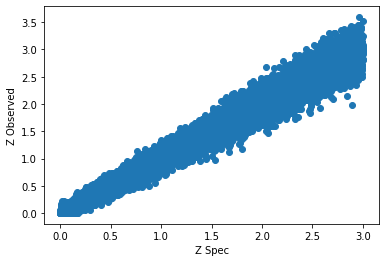

In [6]:
plt.scatter(z_spec, z_obs)
plt.xlabel('Z Spec')
plt.ylabel('Z Observed')

## Plot with `pointMetrics`

In [7]:
from pointMetrics import pointMetrics

In [8]:
pm = pointMetrics(bin_with='z_est')

In [9]:
n_bins = 10
bin_vals, delta_z_binned = pm.calc_bins(z_obs, z_spec, 3., n_bins, return_bins=True)
bin_centers = np.array(bin_vals[:-1]) + 0.5*(bin_vals[1]-bin_vals[0])

Text(0.5, 1.0, 'Robust Bias')

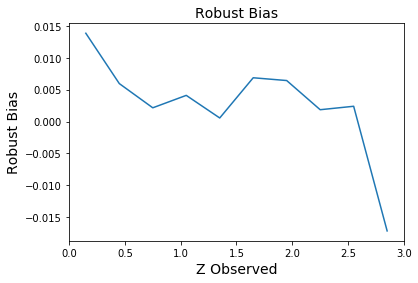

In [10]:
plt.plot(bin_centers, pm.photo_z_robust_bias(z_obs, z_spec, 3., n_bins))
plt.xlim(0, 3)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Robust Bias', size=14)
plt.title('Robust Bias', size=14)

Text(0.5, 1.0, 'Robust Standard Deviation')

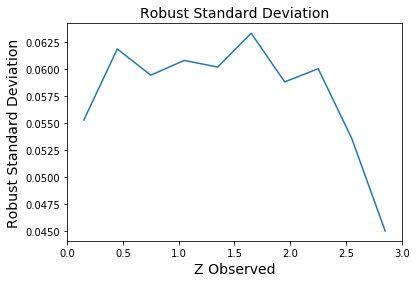

In [11]:
plt.plot(bin_centers, pm.photo_z_robust_stdev(z_obs, z_spec, 3., n_bins))
plt.xlim(0, 3)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Robust Standard Deviation', size=14)
plt.title('Robust Standard Deviation', size=14)

Text(0.5, 1.0, 'Outlier Frac')

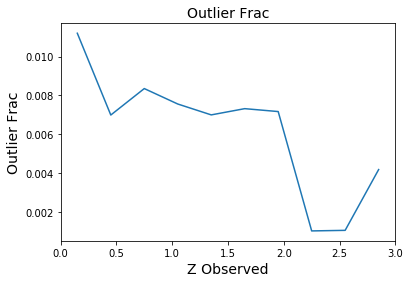

In [12]:
plt.plot(bin_centers, pm.photo_z_outlier_frac(z_obs, z_spec, 3., n_bins))
plt.xlim(0, 3)
plt.xlabel('Z Observed', size=14)
plt.ylabel('Outlier Frac', size=14)
plt.title('Outlier Frac', size=14)